In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from glob import glob
import random

In [2]:
def calc_derivative(df, diff=1):
    dt = pd.Series(df.index).diff(periods=diff)
    dXdt = df.reset_index().diff(periods=diff).div(dt, axis=0)
    dXdt = dXdt.add_suffix('_derivative_1')
    return dXdt.set_index(df.index)

def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

# Metainformationen
df1: Eingehende Werkstücktemperatur 950°C, WZ Temperatur 90°C, Flächenpressung 15 MPa, Druckhaltezeit 10s

df2: Eingehende Werkstücktemperatur 950°C, WZ Temperatur 90°C, Flächenpressung 19 MPa, Druckhaltezeit 10s

df3: Eingehende Werkstücktemperatur 950°C, WZ Temperatur 90°C, Flächenpressung 23 MPa, Druckhaltezeit 10s

In [3]:
df1 = pd.read_excel('WS950_WZ90_p15_t10.xlsx', sheet_name='Sheet1', index_col='timestamp').drop_duplicates()
df1.to_csv('../merged/merged_WS950_WZ90_p15_t10.csv')

In [4]:
df1.head()

,Stempel_innen_mitte,Stempel_aussen,Matrize_oben_zarge,Matrize_mitte_zarge,Matrize_unten_zarge,Werkstueck_boden,Werkstueck_flansch,Werkstueck_zarge_mitte,Werkstück_zarge_unten,Werkstueck_zarge_oben
timestamp,,,,,,,,,,
0.0,90.0,90.0,90.0,90.0,90.0,20.0000,20.0000,20.0000,20.0000,20.0000
6.0,90.0,90.0,90.0,90.0,90.0,39.0195,39.0195,39.0195,39.0195,39.0195
12.0,90.0,90.0,90.0,90.0,90.0,57.6302,57.6302,57.6302,57.6302,57.6302
18.0,90.0,90.0,90.0,90.0,90.0,75.8570,75.8570,75.8570,75.8570,75.8570
24.0,90.0,90.0,90.0,90.0,90.0,93.7225,93.7225,93.7225,93.7225,93.7225


In [5]:
dX1dt = calc_derivative(df1, diff=15).drop(columns='timestamp_derivative_1')

In [6]:
dX1dt.head()

,Stempel_innen_mitte_derivative_1,Stempel_aussen_derivative_1,Matrize_oben_zarge_derivative_1,Matrize_mitte_zarge_derivative_1,Matrize_unten_zarge_derivative_1,Werkstueck_boden_derivative_1,Werkstueck_flansch_derivative_1,Werkstueck_zarge_mitte_derivative_1,Werkstück_zarge_unten_derivative_1,Werkstueck_zarge_oben_derivative_1
timestamp,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(90.0, 160.0)

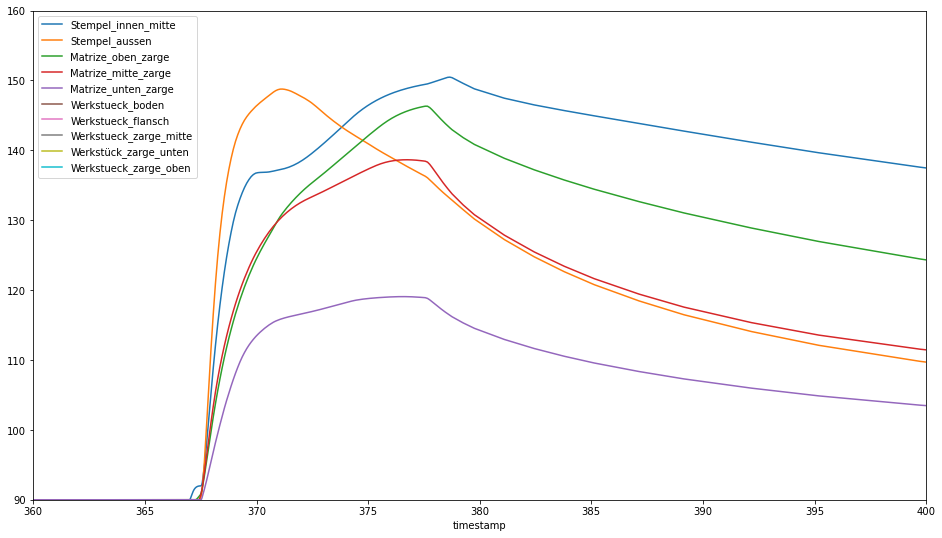

In [7]:
df1.plot(figsize=(16,9))
plt.xlim(360,400)
plt.ylim(90,160)

In [8]:
plot_vars = ['Stempel_innen_mitte', 'Matrize_mitte_zarge', 'Werkstueck_boden', 'Werkstueck_zarge_mitte']
plot_vars_der = [x+'_derivative_1' for x in plot_vars]
start_time = 367

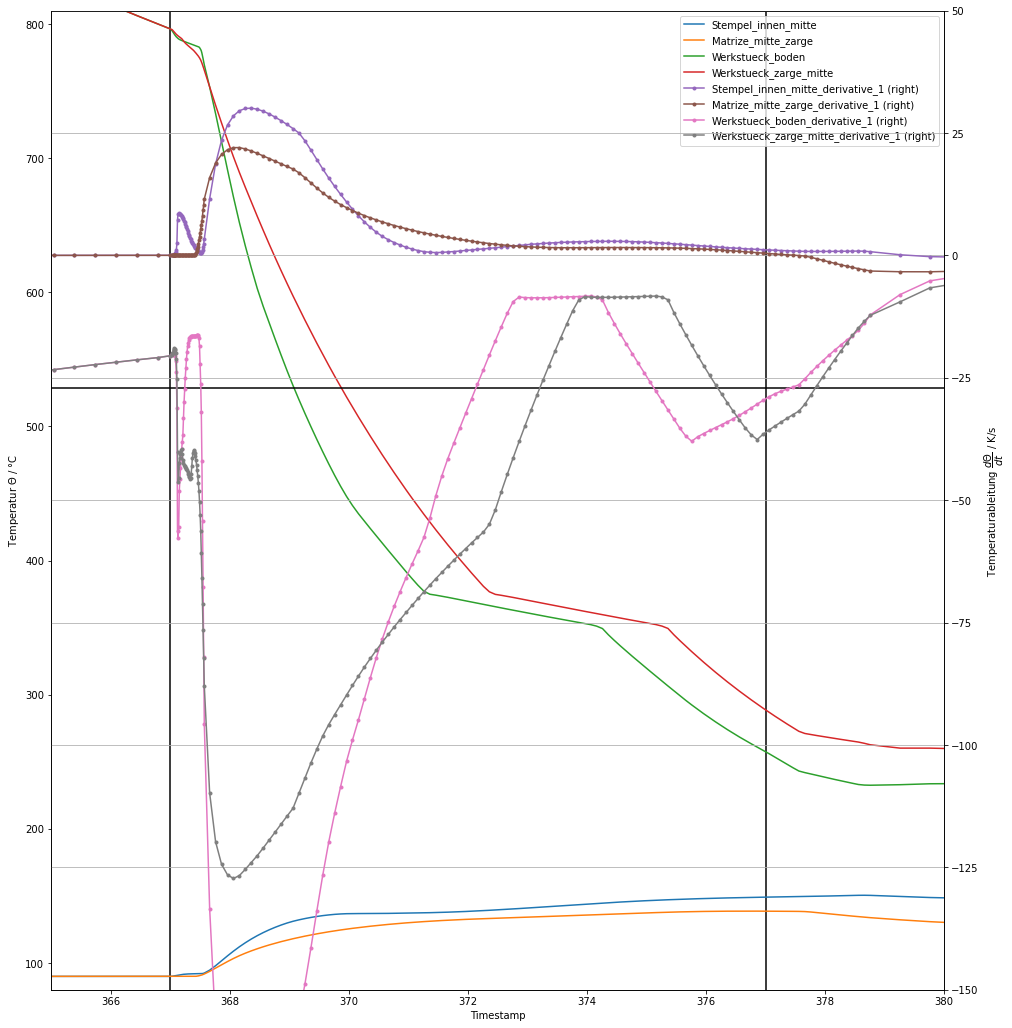

In [9]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(80, 810)
df1[plot_vars].plot(ax=ax1)

dX1dt[plot_vars_der].plot(ax=ax1, secondary_y=True, legend=True, style='.-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperatur $\Theta$ / °C')
ax1.set_xlabel('Timestamp')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_1.png')

In [10]:
df2 = pd.read_excel('WS950_WZ90_p19_t10.xlsx', sheet_name='Sheet1', index_col='timestamp').drop_duplicates()
df2.to_csv('../merged/merged_WS950_WZ90_p19_t10.csv')
dX2dt = calc_derivative(df2, diff=15).drop(columns='timestamp_derivative_1')


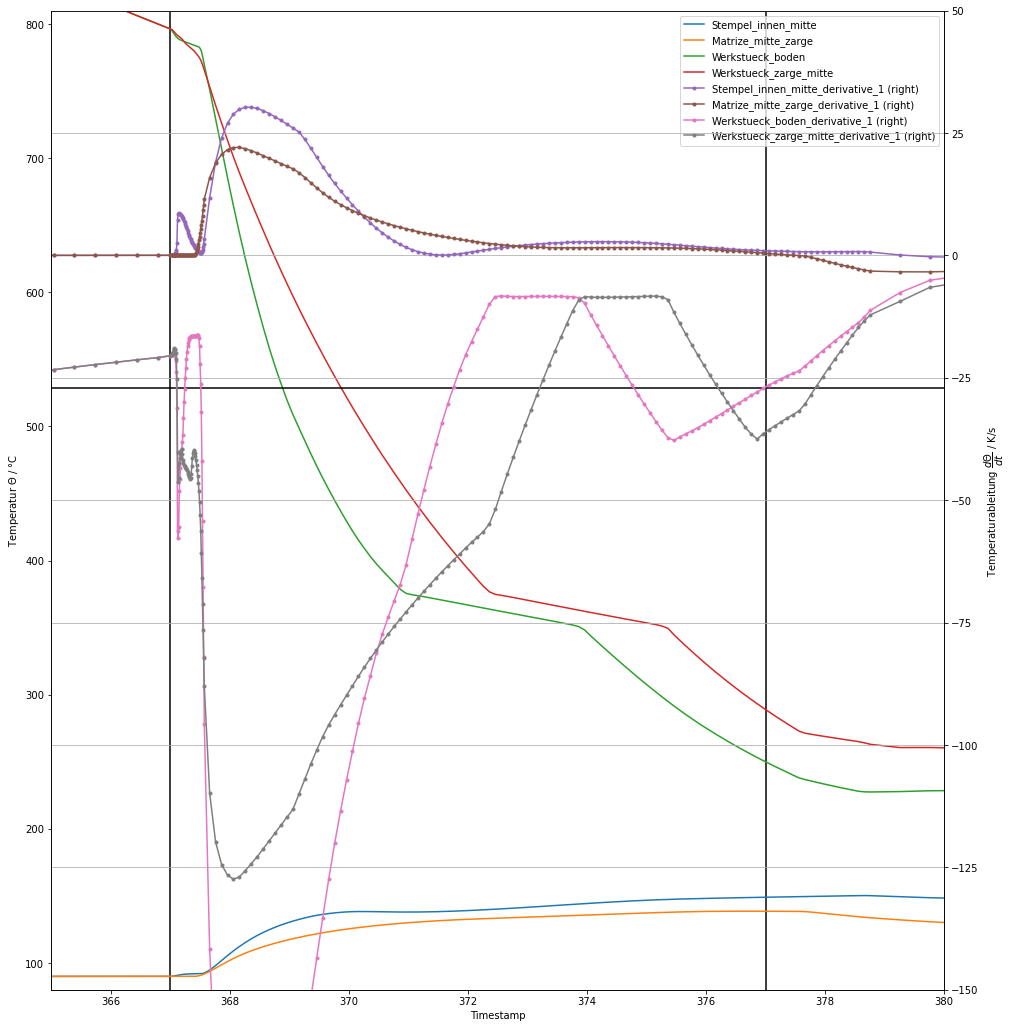

In [11]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(80, 810)
df2[plot_vars].plot(ax=ax1)

dX2dt[plot_vars_der].plot(ax=ax1, secondary_y=True, legend=True, style='.-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperatur $\Theta$ / °C')
ax1.set_xlabel('Timestamp')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_2.png')

In [12]:
df3 = pd.read_excel('WS950_WZ90_p23_t10.xlsx', sheet_name='Sheet1', index_col='timestamp').drop_duplicates()
df3.to_csv('../merged/merged_WS950_WZ90_p23_t10.csv')
dX3dt = calc_derivative(df3, diff=15).drop(columns='timestamp_derivative_1')


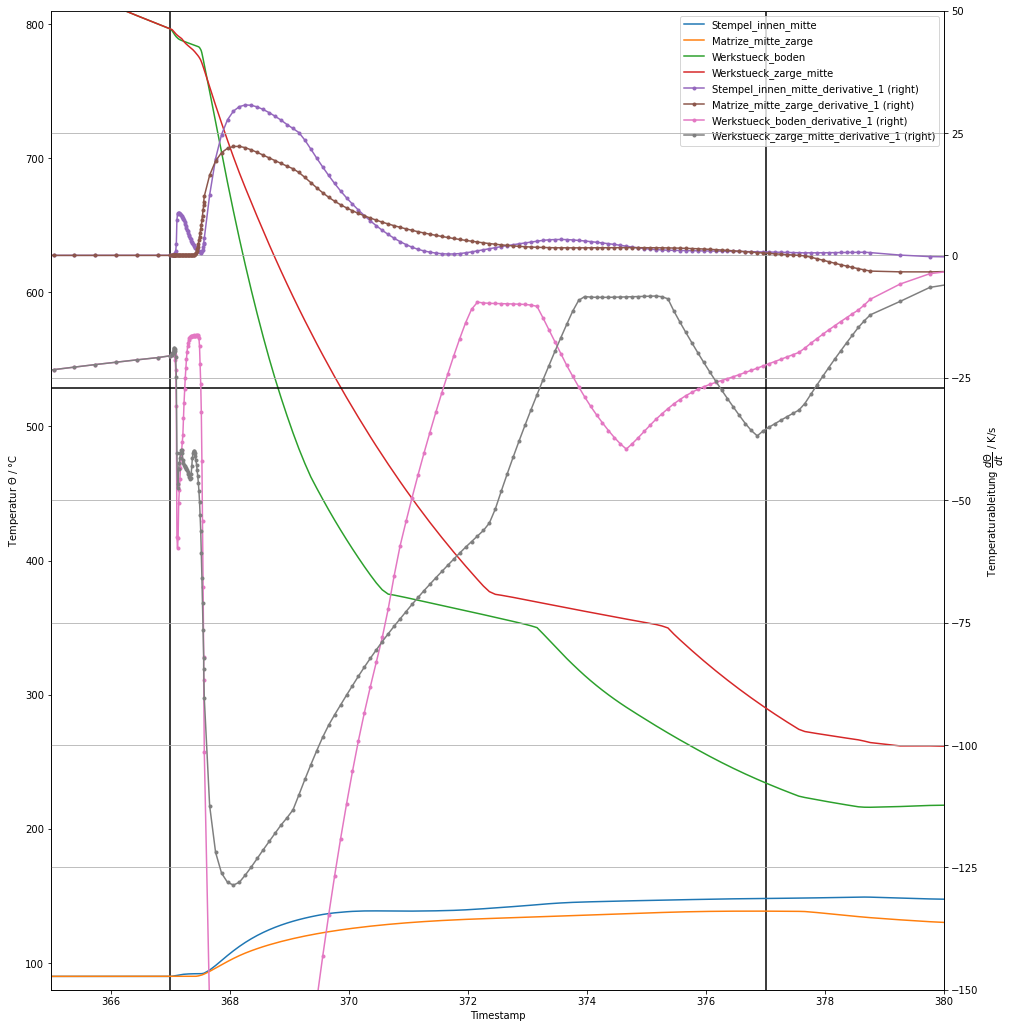

In [13]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(80, 810)
df3[plot_vars].plot(ax=ax1)

dX3dt[plot_vars_der].plot(ax=ax1, secondary_y=True, legend=True, style='.-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperatur $\Theta$ / °C')
ax1.set_xlabel('Timestamp')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_3.png')

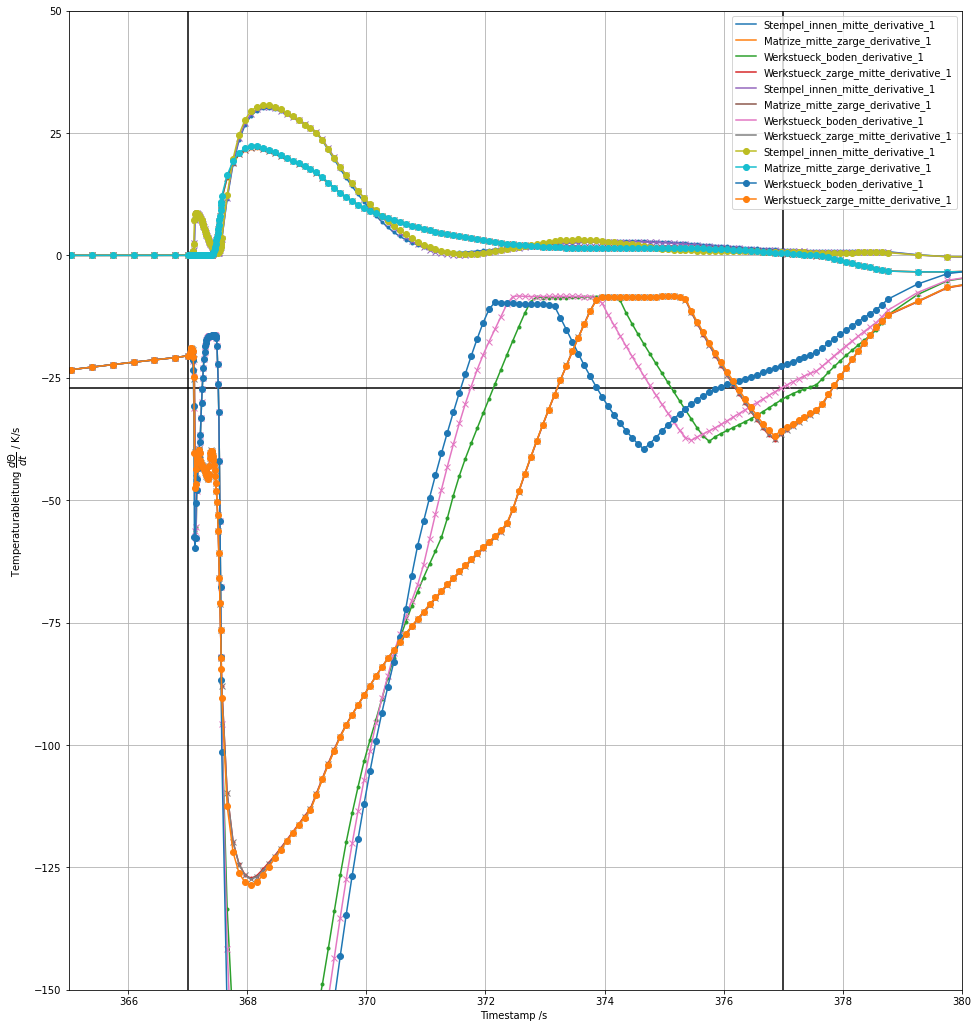

In [14]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')
plt.ylim(-150, 50)

dX1dt[plot_vars_der].plot(ax=ax1, style='.-')
dX2dt[plot_vars_der].plot(ax=ax1, style='x-')
dX3dt[plot_vars_der].plot(ax=ax1, legend=True, style='o-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(-150,50)
ax1.set_ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
ax1.set_xlabel('Timestamp /s ')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_derivatives_123.png')

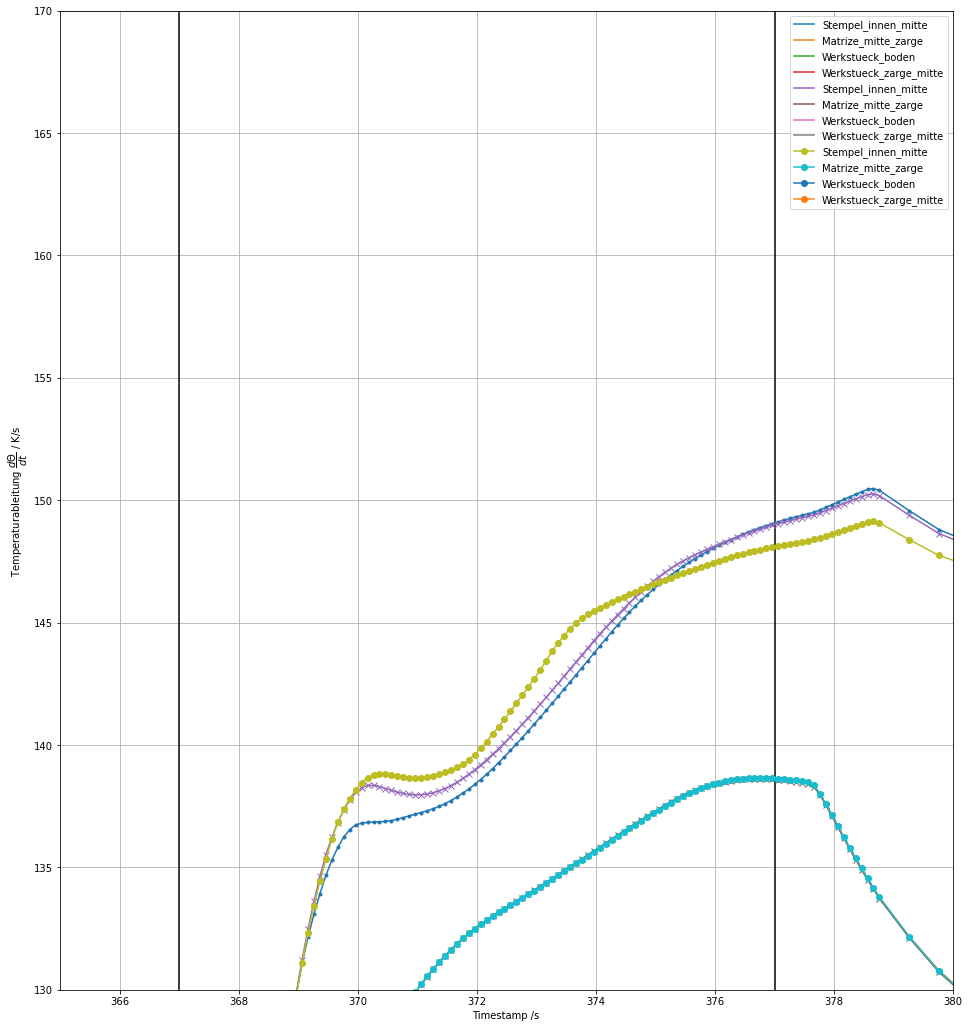

In [15]:
fig, ax1 = plt.subplots(figsize=(16,20))
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=25)
plt.vlines([start_time, start_time+10], ymin=-200, ymax=1000, label='Presse geschlossen', color='black')

df1[plot_vars].plot(ax=ax1, style='.-')
df2[plot_vars].plot(ax=ax1, style='x-')
df3[plot_vars].plot(ax=ax1, legend=True, style='o-')
plt.hlines(-27, xmin=365, xmax=380, color='black')
plt.grid()
plt.ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
plt.ylim(130,170)
ax1.set_ylabel('Temperaturableitung $\dfrac{d \Theta}{dt}$ / K/s ')
ax1.set_xlabel('Timestamp /s ')
plt.xlim(left=365, right=380)
plt.savefig('plots/Boden_Zarge_Mitte_123.png')

### df1 und df3 für training nutzen df2 für testen
Vorher: Ableitungen rechts anhängen

In [16]:
df1_wd = df1.join(dX1dt)
df2_wd = df2.join(dX2dt)
df3_wd = df3.join(dX3dt)

In [72]:
nodelabels=['timestamp', 'Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben', 'Matrize_zarge_mitte','Matrize_zarge_unten', 'Werkstueck_boden', 'Werkstueck_zarge_unten' , 'Werkstueck_zarge_mitte', 'Werkstueck_zarge_oben']

filenames = glob("../merged/*.csv")
#sample from list 80% train test
train = random.sample(filenames, int(len(filenames)*0.7))                      
test = list(set(filenames) - set(train))
print(test)
train_df = []
print('train_data')
for filename in train:
    print("reading: {}".format(filename))    
    df = pd.read_csv(filename,names=nodelabels,skiprows=1,index_col=False).drop_duplicates().drop(columns='timestamp')
    dXdt = calc_derivative(df, diff=5)
    df_wd = df.join(dXdt)
    train_df.append(df_wd)
    
train_data= pd.concat(train_df, axis=0, ignore_index=True).dropna()



print('test_data')
test_df = []

for filename in test:
    print("reading: {}".format(filename))    
    df = pd.read_csv(filename,names=nodelabels,skiprows=1,index_col=False).drop_duplicates().drop(columns='timestamp')
    dXdt = calc_derivative(df, diff=5)
    df_wd = df.join(dXdt)
    test_df.append(df_wd)  
    
test_data= pd.concat(test_df, axis=0, ignore_index=True).dropna()



['../merged/merged_WS840_WZ130_p10_t4.csv', '../merged/merged_WS840_WZ130_p10_t10.csv', '../merged/merged_WS1000_WZ100_p11_t4.csv', '../merged/merged_WS890_WZ160_p11_t4.csv', '../merged/merged_WS1000_WZ100_p11_t6.csv', '../merged/merged_WS940_WZ70_p11_t6.csv']
train_data
reading: ../merged/merged_WS950_WZ110_p19_t8.csv
reading: ../merged/merged_WS890_WZ160_p10_t10.csv
reading: ../merged/merged_WS950_WZ90_p15_t10.csv
reading: ../merged/merged_WS950_WZ90_p23_t10.csv
reading: ../merged/merged_WS890_WZ160_p10_t4.csv
reading: ../merged/merged_WS940_WZ70_p12_t8.csv
reading: ../merged/merged_WS950_WZ90_p19_t10.csv
reading: ../merged/merged_WS1000_WZ100_p11_t8.csv
reading: ../merged/merged_WS950_WZ110_p19_t10.csv
reading: ../merged/merged_WS950_WZ110_p19 .csv
reading: ../merged/merged_WS940_WZ70_p12_t6.csv
reading: ../merged/merged_WS940_WZ70_p11_t4.csv
test_data
reading: ../merged/merged_WS840_WZ130_p10_t4.csv
reading: ../merged/merged_WS840_WZ130_p10_t10.csv
reading: ../merged/merged_WS1000_

/home/fneubuerger/.local/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


In [73]:
train_data.keys()

Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben',
       'Matrize_zarge_mitte', 'Matrize_zarge_unten', 'Werkstueck_boden',
       'Werkstueck_zarge_unten', 'Werkstueck_zarge_mitte',
       'Werkstueck_zarge_oben', 'index_derivative_1',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_zarge_oben_derivative_1', 'Matrize_zarge_mitte_derivative_1',
       'Matrize_zarge_unten_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_zarge_unten_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [74]:

Werkstueck_labels = ['Werkstueck_boden', 'Werkstueck_zarge_mitte',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',                       
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
no_derivatives_labels = ['Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
                        'Matrize_oben_zarge_derivative_1', 'Matrize_mitte_zarge_derivative_1',
                        'Matrize_unten_zarge_derivative_1', 'Werkstueck_boden','Werkstueck_flansch', 'Werkstueck_zarge_mitte', 'Werkstück_zarge_unten',
                       'Werkstueck_zarge_oben', 'Werkstueck_boden_derivative_1',
                       'Werkstueck_flansch_derivative_1',
                       'Werkstueck_zarge_mitte_derivative_1',
                       'Werkstück_zarge_unten_derivative_1',
                       'Werkstueck_zarge_oben_derivative_1']
targets= ['Werkstueck_boden', 'Werkstueck_zarge_mitte',
                       'Werkstueck_zarge_oben']
 

In [75]:
train_data.keys()

Index(['Stempel_innen_mitte', 'Stempel_aussen', 'Matrize_zarge_oben',
       'Matrize_zarge_mitte', 'Matrize_zarge_unten', 'Werkstueck_boden',
       'Werkstueck_zarge_unten', 'Werkstueck_zarge_mitte',
       'Werkstueck_zarge_oben', 'index_derivative_1',
       'Stempel_innen_mitte_derivative_1', 'Stempel_aussen_derivative_1',
       'Matrize_zarge_oben_derivative_1', 'Matrize_zarge_mitte_derivative_1',
       'Matrize_zarge_unten_derivative_1', 'Werkstueck_boden_derivative_1',
       'Werkstueck_zarge_unten_derivative_1',
       'Werkstueck_zarge_mitte_derivative_1',
       'Werkstueck_zarge_oben_derivative_1'],
      dtype='object')

In [76]:
X_train = train_data.drop(labels=Werkstueck_labels , axis=1)
y_train = train_data[targets]
X_test = test_data.drop(labels=Werkstueck_labels, axis=1)
y_test = test_data[targets]

### Simple linear model as baseline

In [77]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [78]:
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:17.854634095124297, R2:0.9962185602357181
test set RMSE:19.313580813573584, R2:0.9972688291570107


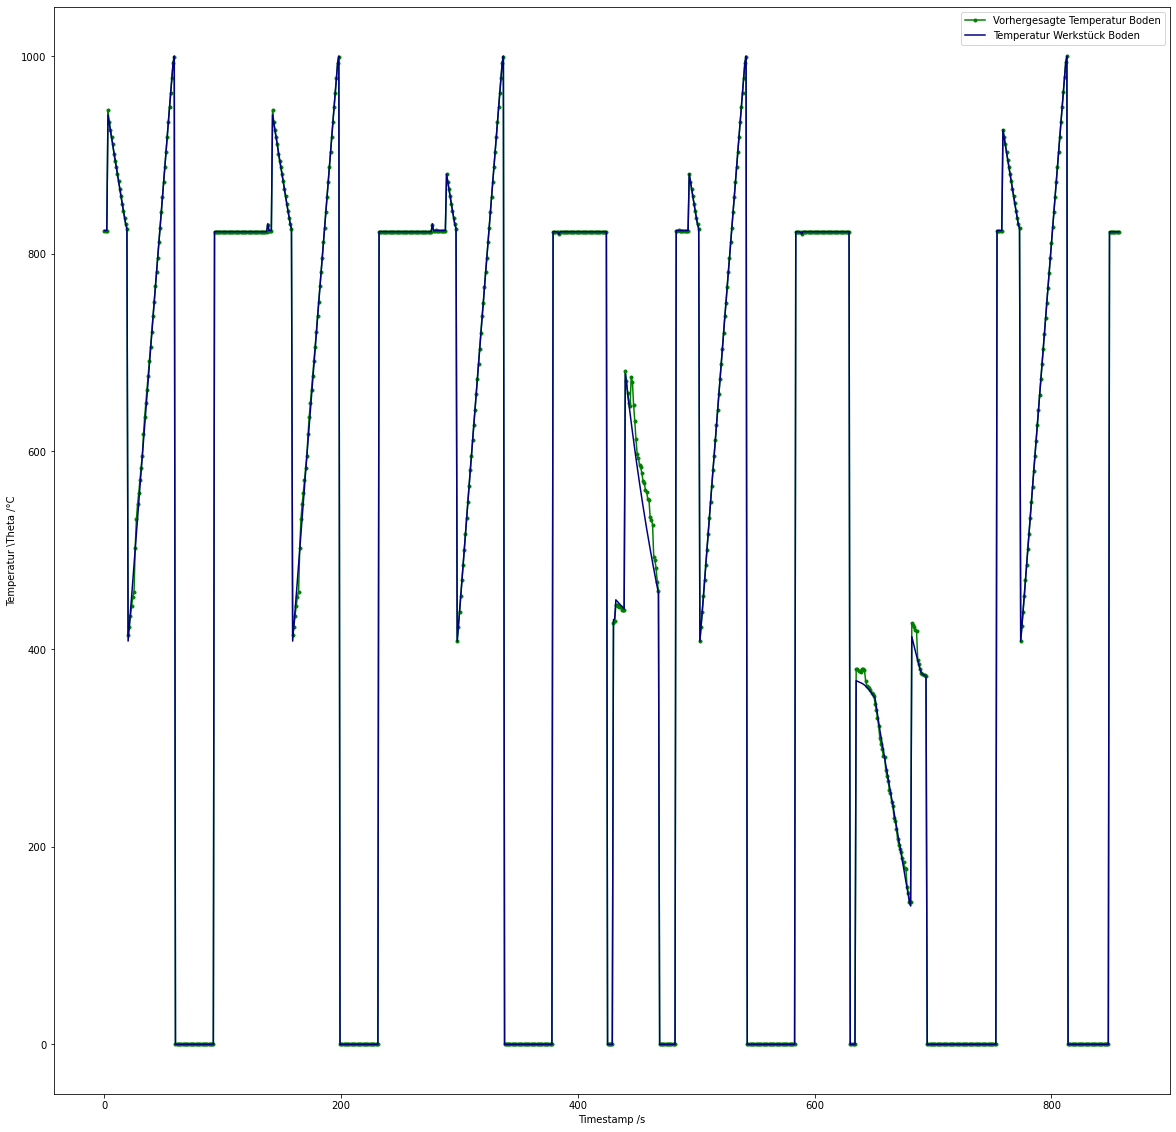

In [83]:
Timestamp=np.arange(len(test_data))
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, test_data['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
#plt.xlim(360, 400)
plt.legend()
plt.savefig('plots/linear_model.png')

### Try RandomForestRegressor

In [84]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
y_hat_train = rf.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = rf.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:0.9748049217472842, R2:0.999988749900444
test set RMSE:13.355772675477777, R2:0.9986937696953445


In [ ]:
plt.figure(figsize=(20,8))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'], '--',label='Temperatur Werkstück Boden', color='navy')
plt.plot(Timestamp, test_data['Stempel_innen_mitte'],label='Temperatur Stempel mitte', color='orange')
#plt.plot(Timestamp, test_data['Matrize_mitte_zarge'],label='Temperatur Stempel mitte', color='crimson')

plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()
plt.savefig('plots/random_forest_model.png')

In [91]:
from sklearn.multioutput import MultiOutputRegressor
gb = MultiOutputRegressor(GradientBoostingRegressor())
gb.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [92]:
y_hat_train = gb.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = gb.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:4.174294360339284, R2:0.999793273098919
test set RMSE:10.825336806615324, R2:0.999141910609393


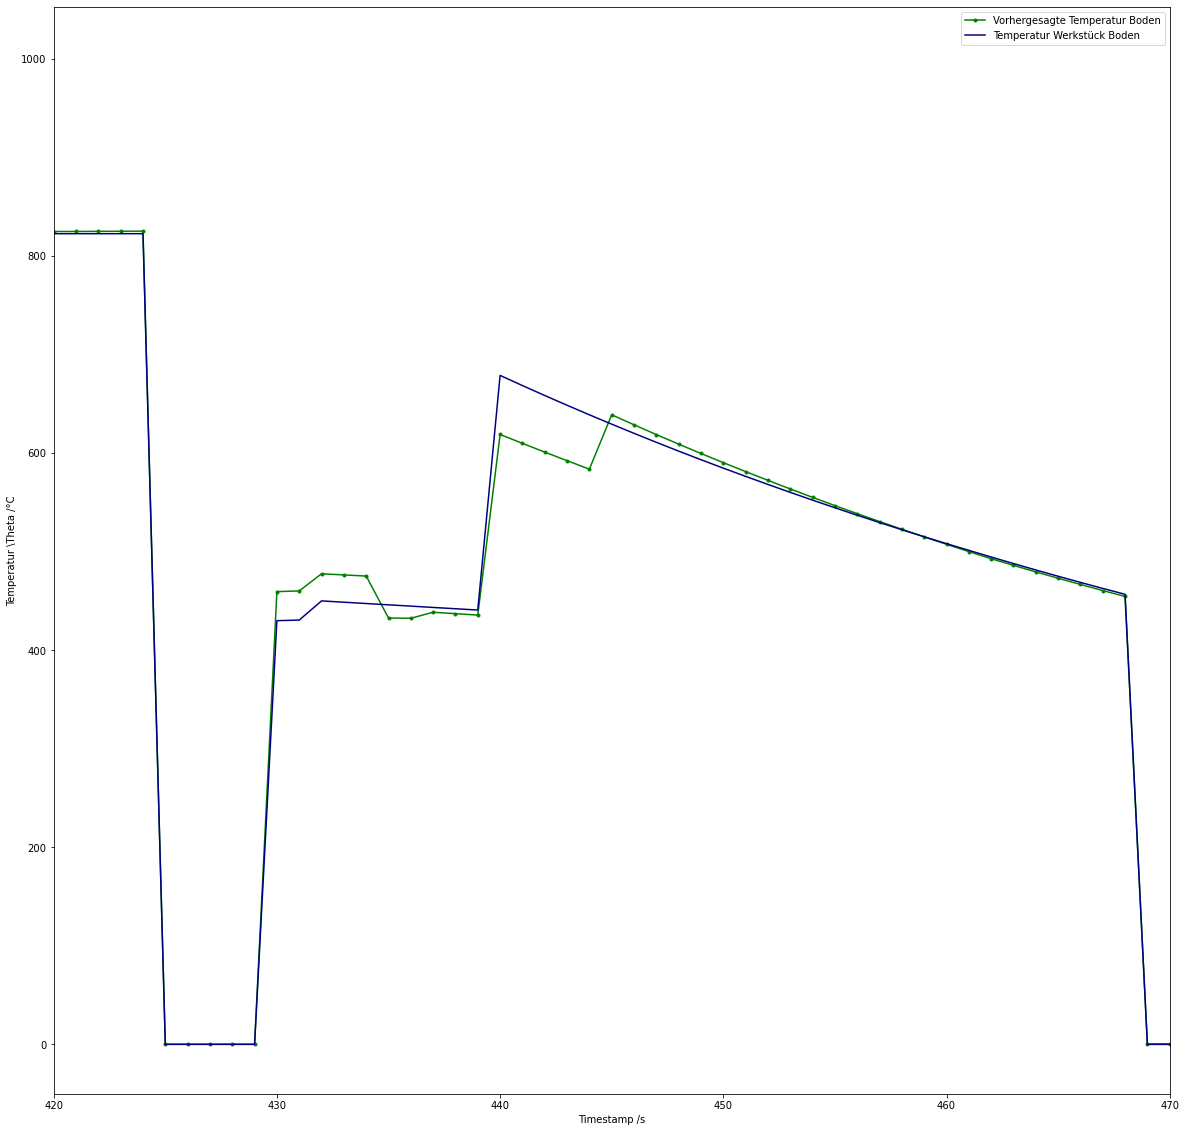

In [122]:
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(420, 470)
plt.legend()

plt.savefig('plots/gradient_boosting_model.png')

### Even better with MLP?

In [95]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, InputLayer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [96]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = X_train.copy()
X_train_scaled = pd.DataFrame(scaler.transform(X_train))


X_test_scaled = X_test.copy()
X_test_scaled= pd.DataFrame(scaler.transform(X_test))


In [97]:
input_dim = len(X_train.keys())
output_dim= len(y_train.keys())
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(output_dim))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 3,555
Trainable params: 3,555
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(loss='mean_squared_error', optimizer='adam')
epochs = 300
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs)

Epoch 1/300
62/62 [==============================] - 1s 4ms/step - loss: 149607.2656 - val_loss: 11422.9092
Epoch 2/300
62/62 [==============================] - 0s 2ms/step - loss: 5264.0713 - val_loss: 744.3510
Epoch 3/300
62/62 [==============================] - 0s 2ms/step - loss: 1099.9042 - val_loss: 622.1845
Epoch 4/300
62/62 [==============================] - 0s 2ms/step - loss: 897.3619 - val_loss: 775.0170
Epoch 5/300
62/62 [==============================] - 0s 2ms/step - loss: 831.1179 - val_loss: 676.6434
Epoch 6/300
62/62 [==============================] - 0s 2ms/step - loss: 758.2397 - val_loss: 598.6259
Epoch 7/300
62/62 [==============================] - 0s 2ms/step - loss: 710.9073 - val_loss: 696.6931
Epoch 8/300
62/62 [==============================] - 0s 2ms/step - loss: 677.1452 - val_loss: 793.9062
Epoch 9/300
62/62 [==============================] - 0s 2ms/step - loss: 654.1177 - val_loss: 848.1202
Epoch 10/300
62/62 [==============================] - 0s 2ms/step 

Epoch 80/300
62/62 [==============================] - 0s 2ms/step - loss: 135.8038 - val_loss: 149.7537
Epoch 81/300
62/62 [==============================] - 0s 2ms/step - loss: 94.2512 - val_loss: 162.7957
Epoch 82/300
62/62 [==============================] - 0s 2ms/step - loss: 91.3464 - val_loss: 182.7819
Epoch 83/300
62/62 [==============================] - 0s 2ms/step - loss: 94.1594 - val_loss: 256.9325
Epoch 84/300
62/62 [==============================] - 0s 2ms/step - loss: 112.9640 - val_loss: 257.4424
Epoch 85/300
62/62 [==============================] - 0s 2ms/step - loss: 114.2389 - val_loss: 184.0340
Epoch 86/300
62/62 [==============================] - 0s 2ms/step - loss: 95.7147 - val_loss: 250.7975
Epoch 87/300
62/62 [==============================] - 0s 2ms/step - loss: 95.3166 - val_loss: 141.8145
Epoch 88/300
62/62 [==============================] - 0s 2ms/step - loss: 89.1164 - val_loss: 159.4581
Epoch 89/300
62/62 [==============================] - 0s 2ms/step - lo

Epoch 159/300
62/62 [==============================] - 0s 2ms/step - loss: 58.3921 - val_loss: 128.5229
Epoch 160/300
62/62 [==============================] - 0s 2ms/step - loss: 59.4604 - val_loss: 129.3655
Epoch 161/300
62/62 [==============================] - 0s 2ms/step - loss: 63.6328 - val_loss: 119.2372
Epoch 162/300
62/62 [==============================] - 0s 2ms/step - loss: 61.6114 - val_loss: 135.8366
Epoch 163/300
62/62 [==============================] - 0s 2ms/step - loss: 60.6549 - val_loss: 110.7711
Epoch 164/300
62/62 [==============================] - 0s 2ms/step - loss: 62.3750 - val_loss: 119.6302
Epoch 165/300
62/62 [==============================] - 0s 2ms/step - loss: 62.3895 - val_loss: 130.3963
Epoch 166/300
62/62 [==============================] - 0s 2ms/step - loss: 57.3677 - val_loss: 115.5040
Epoch 167/300
62/62 [==============================] - 0s 2ms/step - loss: 55.0951 - val_loss: 105.2936
Epoch 168/300
62/62 [==============================] - 0s 2ms/st

Epoch 238/300
62/62 [==============================] - 0s 2ms/step - loss: 37.2378 - val_loss: 107.5536
Epoch 239/300
62/62 [==============================] - 0s 2ms/step - loss: 38.6259 - val_loss: 113.7549
Epoch 240/300
62/62 [==============================] - 0s 2ms/step - loss: 33.3677 - val_loss: 109.4021
Epoch 241/300
62/62 [==============================] - 0s 2ms/step - loss: 43.2608 - val_loss: 108.7865
Epoch 242/300
62/62 [==============================] - 0s 2ms/step - loss: 36.1790 - val_loss: 112.5964
Epoch 243/300
62/62 [==============================] - 0s 2ms/step - loss: 35.6629 - val_loss: 137.8956
Epoch 244/300
62/62 [==============================] - 0s 2ms/step - loss: 36.8630 - val_loss: 102.5667
Epoch 245/300
62/62 [==============================] - 0s 2ms/step - loss: 34.5956 - val_loss: 109.5240
Epoch 246/300
62/62 [==============================] - 0s 2ms/step - loss: 33.7414 - val_loss: 543.7105
Epoch 247/300
62/62 [==============================] - 0s 2ms/st

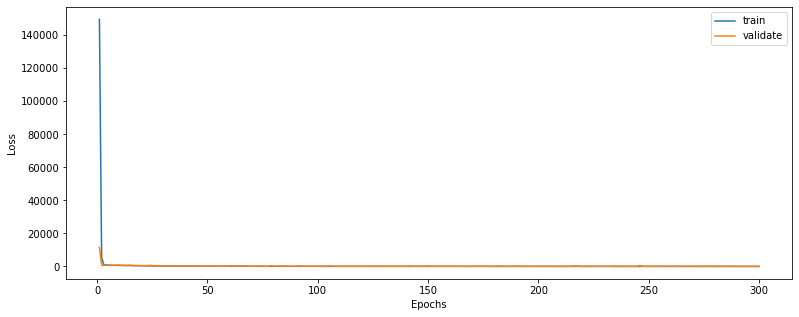

In [99]:
def plot_loss(fit_history):
    plt.figure(figsize=(13,5))
    plt.plot(range(1, len(fit_history.history['loss'])+1), fit_history.history['loss'], label='train')
    plt.plot(range(1, len(fit_history.history['val_loss'])+1), fit_history.history['val_loss'], label='validate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

In [100]:
y_hat_train = model.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = model.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:4.637442787059891, R2:0.9997455979853389
test set RMSE:9.51916179465288, R2:0.9993365496661241


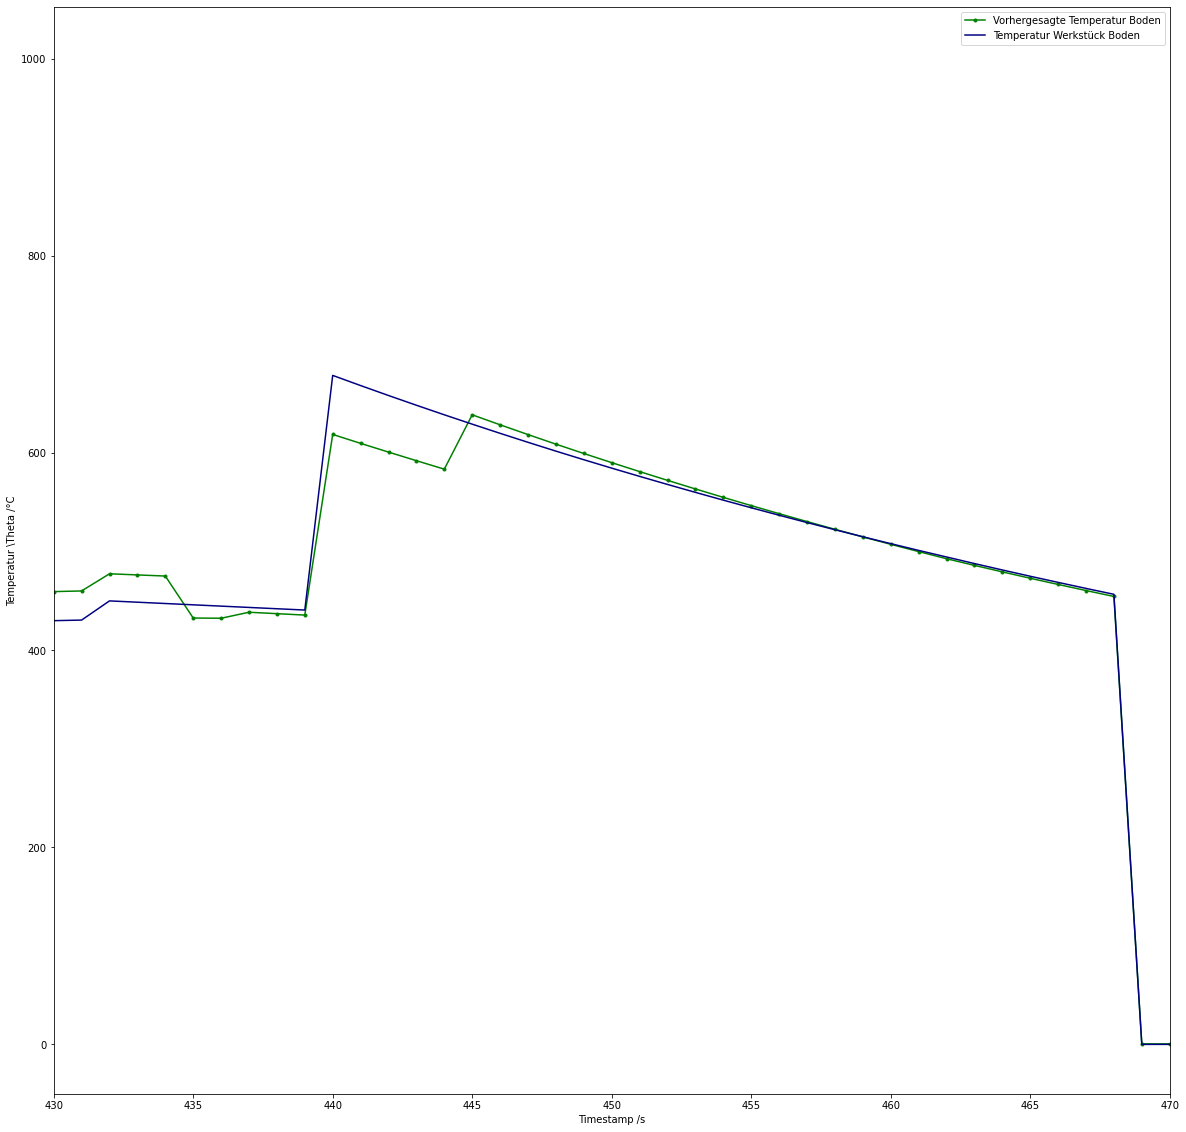

In [121]:
plt.figure(figsize=(20,20))
plt.plot(Timestamp, y_hat_test[:,0], 'g.-', label='Vorhergesagte Temperatur Boden')
plt.plot(Timestamp, y_test['Werkstueck_boden'],label='Temperatur Werkstück Boden', color='navy')
plt.ylabel('Temperatur \Theta /°C')
plt.xlabel('Timestamp /s')
plt.xlim(430, 470)
plt.legend()

plt.savefig('plots/mlp.png')

# LSTM?

In [111]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, TimeDistributed
tf.__version__

'2.8.0'

In [112]:
# taken from the TF Documentation
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train, val_df=test, test_df=test,
               label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

    # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
    def plot(self, model=None, plot_col='Werkstueck_boden', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [min]')
        
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

        ds = ds.map(self.split_window)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
    # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
    # And cache it for next time
        self._example = result
        return result


def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(amsgrad=True),
                metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanSquaredError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history



Total window size: 200
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]
Label column name(s): ['Werkstueck_boden', 'Werkstueck_zarge_mitte', 'Werkstueck_zarge_oben']

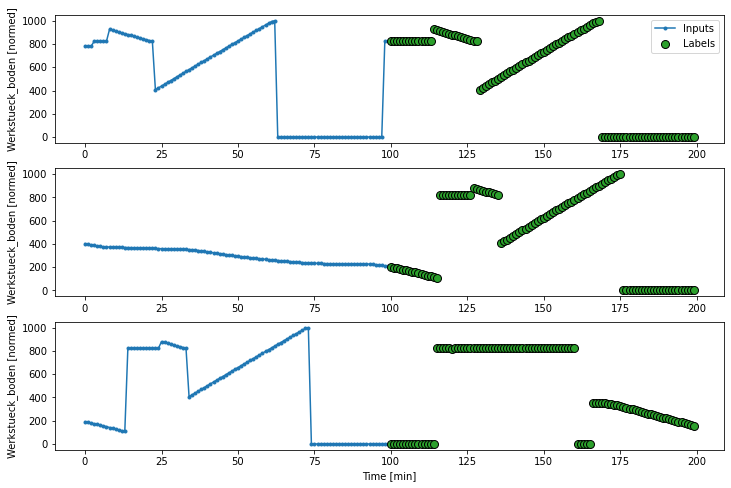

In [114]:
OUT_STEPS = 100
MAX_EPOCHS = 300
multi_window = WindowGenerator(input_width=100,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               label_columns=targets,
                               train_df=train_data,
                               val_df=test_data)

multi_window.plot()
multi_window

In [123]:
num_features = output_dim
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LSTM(128, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)


Epoch 1/300
55/55 [==============================] - 12s 139ms/step - loss: 338996.9688 - mean_absolute_error: 505.8020 - mean_squared_error: 338996.9688 - val_loss: 354074.8750 - val_mean_absolute_error: 473.9979 - val_mean_squared_error: 354074.8750
Epoch 2/300
55/55 [==============================] - 7s 123ms/step - loss: 330147.9375 - mean_absolute_error: 498.7245 - mean_squared_error: 330147.9375 - val_loss: 346406.7188 - val_mean_absolute_error: 470.9430 - val_mean_squared_error: 346406.7500
Epoch 3/300
55/55 [==============================] - 7s 130ms/step - loss: 322668.1875 - mean_absolute_error: 492.7612 - mean_squared_error: 322668.2812 - val_loss: 339533.6875 - val_mean_absolute_error: 468.1573 - val_mean_squared_error: 339533.6875
Epoch 4/300
55/55 [==============================] - 8s 136ms/step - loss: 315214.8750 - mean_absolute_error: 486.5769 - mean_squared_error: 315214.8438 - val_loss: 332897.6250 - val_mean_absolute_error: 465.4239 - val_mean_squared_error: 332897.

55/55 [==============================] - 11s 203ms/step - loss: 172282.0312 - mean_absolute_error: 346.5870 - mean_squared_error: 172282.0938 - val_loss: 203343.8594 - val_mean_absolute_error: 399.1276 - val_mean_squared_error: 203343.8438
Epoch 34/300
55/55 [==============================] - 11s 198ms/step - loss: 169053.5938 - mean_absolute_error: 342.8843 - mean_squared_error: 169053.5938 - val_loss: 200503.8281 - val_mean_absolute_error: 397.3063 - val_mean_squared_error: 200503.8438
Epoch 35/300
55/55 [==============================] - 11s 195ms/step - loss: 165944.1562 - mean_absolute_error: 339.3025 - mean_squared_error: 165944.1250 - val_loss: 197760.9844 - val_mean_absolute_error: 395.5220 - val_mean_squared_error: 197760.9844
Epoch 36/300
55/55 [==============================] - 11s 197ms/step - loss: 162904.4219 - mean_absolute_error: 335.8327 - mean_squared_error: 162904.4375 - val_loss: 195785.3906 - val_mean_absolute_error: 394.0257 - val_mean_squared_error: 195785.3906
E

55/55 [==============================] - 11s 207ms/step - loss: 109221.3984 - mean_absolute_error: 274.1892 - mean_squared_error: 109221.4297 - val_loss: 150021.1250 - val_mean_absolute_error: 357.4659 - val_mean_squared_error: 150021.1406
Epoch 66/300
55/55 [==============================] - 11s 208ms/step - loss: 108222.1094 - mean_absolute_error: 273.0152 - mean_squared_error: 108222.1250 - val_loss: 149244.0312 - val_mean_absolute_error: 356.6206 - val_mean_squared_error: 149244.0312
Epoch 67/300
55/55 [==============================] - 13s 234ms/step - loss: 107263.5234 - mean_absolute_error: 271.9211 - mean_squared_error: 107263.5469 - val_loss: 148496.3438 - val_mean_absolute_error: 355.8045 - val_mean_squared_error: 148496.3438
Epoch 68/300
55/55 [==============================] - 12s 223ms/step - loss: 106342.1953 - mean_absolute_error: 270.9358 - mean_squared_error: 106342.1797 - val_loss: 147775.7812 - val_mean_absolute_error: 355.0194 - val_mean_squared_error: 147775.7656
E

Epoch 98/300
55/55 [==============================] - 12s 224ms/step - loss: 88723.3047 - mean_absolute_error: 257.8831 - mean_squared_error: 88723.3203 - val_loss: 136525.2500 - val_mean_absolute_error: 339.4681 - val_mean_squared_error: 136525.2500


In [124]:
multi_val_performance = {}
multi_performance = {}
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)


21/21 [==============================] - 1s 52ms/step - loss: 136525.2656 - mean_absolute_error: 339.4681 - mean_squared_error: 136525.2500


ValueError: could not convert string to float: '../merged/merged_WS840_WZ130_p10_t4.csv'